In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('Nifty50.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,Unnamed: 10
0,00-01-1900,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95,NaN
1,04-01-2000,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92,NaN
2,05-01-2000,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95,NaN
3,06-01-2000,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94,NaN
4,07-01-2000,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94,NaN


In [5]:
del df["Unnamed: 10"]
del df["Volume"]
del df["Turnover"]
del df["P/E"]
del df["P/B"]
del df["Div Yield"]

In [6]:
df.shape

(5353, 5)

In [7]:
change = np.array([])

for i in range(1,5353):
    see=((df.iloc[i]["Close"]-df.iloc[i-1]["Close"])/df.iloc[i-1]["Close"])*100
    change=np.append(change,see)
change=np.insert(change,0,-100)
df["change"]=change.copy()

In [8]:
df.drop(0,inplace=True)
df = df.reset_index(drop=True)


In [9]:
df.head()

,Date,Open,High,Low,Close,change
0,04-01-2000,1594.40,1641.95,1594.40,1638.70,2.920487
1,05-01-2000,1634.55,1635.50,1555.05,1595.80,-2.617929
2,06-01-2000,1595.80,1639.00,1595.80,1617.60,1.366086
3,07-01-2000,1616.60,1628.25,1597.20,1613.30,-0.265826
4,10-01-2000,1615.65,1662.10,1614.95,1632.95,1.218000


In [9]:
import matplotlib.pyplot as plt

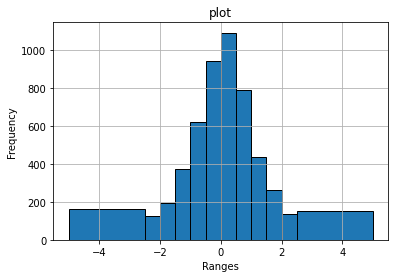

In [10]:
x=np.array(df["change"])
plt.hist(x, bins=[-5,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,5], edgecolor="black") 
plt.ylabel("Frequency")
plt.xlabel("Ranges")
plt.grid()
plt.title("plot")
plt.show()

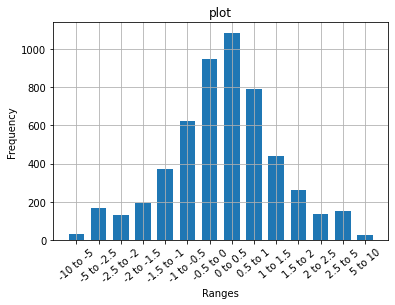

In [11]:
freq={}
freq["-10 to -5"]=0
freq["-5 to -2.5"]=0
freq["-2.5 to -2"]=0
freq["-2 to -1.5"]=0
freq["-1.5 to -1"]=0
freq["-1 to -0.5"]=0
freq["-0.5 to 0"]=0
freq["0 to 0.5"]=0
freq["0.5 to 1"]=0
freq["1 to 1.5"]=0
freq["1.5 to 2"]=0
freq["2 to 2.5"]=0
freq["2.5 to 5"]=0
freq["5 to 10"]=0

x=np.array(df["change"])
for ele in x:
    if(-10<=ele and ele<=-5):
        freq["-10 to -5"]=freq["-10 to -5"]+1
    elif(-5<=ele and ele<=-2.5):
        freq["-5 to -2.5"]=freq["-5 to -2.5"]+1
    elif(-2.5<=ele and ele<=-2):
        freq["-2.5 to -2"]=freq["-2.5 to -2"]+1
    elif(-2<=ele and ele<=-1.5):
        freq["-2 to -1.5"]=freq["-2 to -1.5"]+1
    elif(-1.5<=ele and ele<=-1):
        freq["-1.5 to -1"]=freq["-1.5 to -1"]+1
    elif(-1<=ele and ele<=-0.5):
        freq["-1 to -0.5"]=freq["-1 to -0.5"]+1
    elif(-0.5<=ele and ele<=0):
        freq["-0.5 to 0"]=freq["-0.5 to 0"]+1
    elif(0<=ele and ele<=0.5):
        freq["0 to 0.5"]=freq["0 to 0.5"]+1
    elif(0.5<=ele and ele<=1):
        freq["0.5 to 1"]=freq["0.5 to 1"]+1
    elif(1<=ele and ele<=1.5):
        freq["1 to 1.5"]=freq["1 to 1.5"]+1
    elif(1.5<=ele and ele<=2):
        freq["1.5 to 2"]=freq["1.5 to 2"]+1
    elif(2<=ele and ele<=2.5):
        freq["2 to 2.5"]=freq["2 to 2.5"]+1
    elif(2.5<=ele and ele<=5):
        freq["2.5 to 5"]=freq["2.5 to 5"]+1
    elif(5<=ele and ele<=10):
        freq["5 to 10"]=freq["5 to 10"]+1
    
frequency=[freq["-10 to -5"],freq["-5 to -2.5"],freq["-2.5 to -2"],freq["-2 to -1.5"],freq["-1.5 to -1"],freq["-1 to -0.5"],freq["-0.5 to 0"],
           freq["0 to 0.5"],freq["0.5 to 1"],freq["1 to 1.5"],freq["1.5 to 2"],freq["2 to 2.5"],freq["2.5 to 5"],freq["5 to 10"]]
rangess=["-10 to -5","-5 to -2.5","-2.5 to -2","-2 to -1.5","-1.5 to -1","-1 to -0.5","-0.5 to 0","0 to 0.5","0.5 to 1","1 to 1.5",
      "1.5 to 2","2 to 2.5","2.5 to 5","5 to 10"]
plt.bar(rangess,frequency,width=0.7)
plt.xticks(rotation=40)
plt.ylabel("Frequency")
plt.xlabel("Ranges")
plt.grid()
plt.title("plot")
plt.show()




In [12]:
posDays=0
negDays=0
pos=0
neg=0
zero=0
for ele in x:
    if(ele>0):
        pos=pos+ele
        posDays=posDays+1
    elif(ele<0):
        neg=neg+ele
        negDays=negDays+1
    else:
        zero=zero+1
print("No of days market was positive: ",posDays)
print("Total pos sum: ",pos)
print("No of days market was negative: ",negDays)
print("Total neg sum: ",neg)
print("Number of days market did not moved: ",zero)

No of days market was positive:  2892
Total pos sum:  2795.4740370896056
No of days market was negative:  2454
Total neg sum:  -2509.2442787950818
Number of days market did not moved:  6


In [13]:
#Conclusion-1 
# -0.5 to 0< 0 to 0.5
# -1 to -0.5 < 0.5 to 1
# -1.5 to -1< 1 to 1.5
# And so on
df.head()

,Date,Open,High,Low,Close,change
0,04-01-2000,1594.40,1641.95,1594.40,1638.70,2.920487
1,05-01-2000,1634.55,1635.50,1555.05,1595.80,-2.617929
2,06-01-2000,1595.80,1639.00,1595.80,1617.60,1.366086
3,07-01-2000,1616.60,1628.25,1597.20,1613.30,-0.265826
4,10-01-2000,1615.65,1662.10,1614.95,1632.95,1.218000


In [14]:
import datetime as dt
posDays=0
negDays=0
pos=0
neg=0
zero=0
for i in range(0,5352):
    year=df.iloc[i]["Date"][6]+df.iloc[i]["Date"][7]+df.iloc[i]["Date"][8]+df.iloc[i]["Date"][9]
    month=df.iloc[i]["Date"][3]+df.iloc[i]["Date"][4]
    day=df.iloc[i]["Date"][0]+df.iloc[i]["Date"][1]
    year=int(year)
    month=int(month)
    day=int(day)
    x_date = dt.date(year, month, day)
    no = x_date.weekday()
    if(no==3):
        ele=df.iloc[i]["change"]
        if(ele>0):
            pos=pos+ele
            posDays=posDays+1
        elif(ele<0):
            neg=neg+ele
            negDays=negDays+1
        else:
            zero=zero+1
print("No of days market was positive and the day was expiry: ",posDays)
print("Total pos sum and the day was expiry: ",pos)
print("No of days market was negative and the day was expiry: ",negDays)
print("Total neg sum and the day was expiry: ",neg)
print("Number of days market did not moved and the day was expiry: ",zero)

No of days market was positive and the day was expiry:  569
Total pos sum and the day was expiry:  533.4694819461481
No of days market was negative and the day was expiry:  497
Total neg sum and the day was expiry:  -497.6199266402107
Number of days market did not moved and the day was expiry:  1


In [15]:
import datetime as dt
posDays=0
negDays=0
pos=0
neg=0
zero=0
monday={}
tuesday={}
wednesday={}
thursday={}
friday={}
for i in range(0,5352):
    year=df.iloc[i]["Date"][6]+df.iloc[i]["Date"][7]+df.iloc[i]["Date"][8]+df.iloc[i]["Date"][9]
    month=df.iloc[i]["Date"][3]+df.iloc[i]["Date"][4]
    day=df.iloc[i]["Date"][0]+df.iloc[i]["Date"][1]
    year=int(year)
    month=int(month)
    day=int(day)
    x_date = dt.date(year, month, day)
    no = x_date.weekday()
    if(no==0):
        ele=df.iloc[i]["change"]
        if year in monday:
            monday[year]=monday[year]+ele
        else:
            monday[year]=ele
    elif(no==1):
        ele=df.iloc[i]["change"]
        if year in tuesday:
            tuesday[year]=tuesday[year]+ele
        else:
            tuesday[year]=ele
    elif(no==2):
        ele=df.iloc[i]["change"]
        if year in wednesday:
            wednesday[year]=wednesday[year]+ele
        else:
            wednesday[year]=ele    
    elif(no==3):
        ele=df.iloc[i]["change"]
        if year in thursday:
            thursday[year]=thursday[year]+ele
        else:
            thursday[year]=ele
    elif(no==4):
        ele=df.iloc[i]["change"]
        if year in friday:
            friday[year]=friday[year]+ele
        else:
            friday[year]=ele
    

sum=0
for key,value in monday.items():
    sum=sum+value

a=sum
sum=0
for key,value in tuesday.items():
    sum=sum+value
b=sum
sum=0
for key,value in wednesday.items():
    sum=sum+value

c=sum
sum=0
for key,value in thursday.items():
    sum=sum+value
d=sum
sum=0
for key,value in friday.items():
    sum=sum+value
e=sum



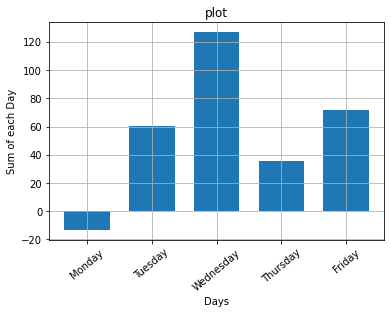

In [16]:
Sum_day=[a,b,c,d,e]
Days=["Monday","Tuesday","Wednesday","Thursday","Friday"]
plt.bar(Days,Sum_day,width=0.7)
plt.xticks(rotation=40)
plt.ylabel("Sum of each Day")
plt.xlabel("Days")
plt.grid()
plt.title("plot")
plt.show()

In [17]:
df.describe()

,Open,High,Low,Close,change
count,5352.000000,5352.000000,5352.00000,5352.000000,5352.000000
mean,5640.140303,5677.339070,5595.00682,5636.929232,0.053481
std,3668.938201,3680.631123,3647.51627,3664.356355,1.447124
min,853.000000,877.000000,849.95000,854.200000,-12.980464
25%,2082.287500,2098.075000,2063.15000,2081.662500,-0.607496
50%,5234.075000,5277.600000,5196.57500,5232.775000,0.094237
75%,8332.300000,8376.762500,8274.50000,8328.400000,0.769325
max,15915.350000,15915.650000,15842.40000,15879.650000,17.744066


Weightage occupied by the top 10 companies is:  61.51  %


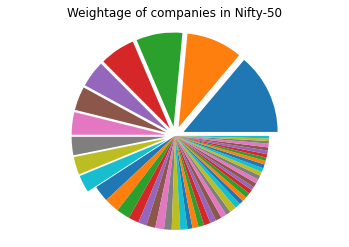

In [18]:
#conclusion- here the standard deviation is the measure of volatility 
companies=["HDFCBANK","RELIANCE","ICICIBANK","INFY","ITC","TCS","L&T","AXISBANK","KOTAKBANK","HINDUNILVR","SBIN","BHARTIARTL"
          ,"BAJFINANCE","ASIANPAINT","M&M","MARUTI","HCLTECH","SUNPHARMA","TITAN","LTIM","ADANIENT","TATASTEEL","BAJAJFINSV","ULTRACEMCO",
          "NTPC","INDUSINDBK","POWERGRID","JSWSTEEL","TATAMOTORS","NESTLEIND","HINDALCO","GRASIM","TECHM","ADANIPORTS","CIPLA","WIPRO",
          "ONGC","HDFCLIFE","SBILIFE","DRREDDY","BRITANNIA","COALINDIA","TATACONSUM","APOLLOHOSP","EICHERMOT","DIVISLAB","BAJAJ-AUTO","UPL",
          "HEROMOTOCO","BPCL"]
x=len(companies)
weightage=[13.77,9.56,7.87,6.01,4.55,4.04,3.84,3.13,3.04,2.93,2.77,2.56,2.29,1.77,1.45,1.53,1.49,1.30,1.45,1.23,0.84,1.05,0.97,
          1.12,1.02,1.03,0.98,0.81,1.14,0.95,0.73,0.78,0.86,0.69,0.62,0.74,0.74,0.72,0.68,0.67,0.68,0.62,0.58,0.57,0.62,0.54,0.64,
          0.44,0.44,0.43]
x=len(weightage)
explode=[]
sum=0
for i in range(0,11):
    sum=sum+weightage[i]
sum= "{:.2f}".format(sum)
print("Weightage occupied by the top 10 companies is: ",sum," %")
for i in range(1,11):
    explode.append(0.5)
for i in range(1,41):
    explode.append(0)
plt.pie(weightage,radius=5,explode=explode)
plt.axis("equal")

plt.title("Weightage of companies in Nifty-50")
plt.show()

-87.93687728069673
{2000: -27.116101189871916, 2001: -14.579979132343535, 2002: 2.8040650432050103, 2003: 48.52878429881888, 2004: 6.413820201763257, 2005: 28.36989904433759, 2006: 35.56817074882961, 2007: 42.51600974625878, 2008: -70.06871586231978, 2009: 60.046066850755146, 2010: 1.4103123673806008, 2011: -39.81788946599143, 2012: 6.2775365149075775, 2013: -14.150798283742215, 2014: 0.696537771883327, 2015: -34.20210853739243, 2016: -20.644481031964045, 2017: -14.888855715733232, 2018: -19.24192024830209, 2019: -24.05323815272545, 2020: -29.673388374084002, 2021: -12.130603874366404}
2000 :  -27.116101189871916
2001 :  -14.579979132343535
2002 :  2.8040650432050103
2003 :  48.52878429881888
2004 :  6.413820201763257
2005 :  28.36989904433759
2006 :  35.56817074882961
2007 :  42.51600974625878
2008 :  -70.06871586231978
2009 :  60.046066850755146
2010 :  1.4103123673806008
2011 :  -39.81788946599143
2012 :  6.2775365149075775
2013 :  -14.150798283742215
2014 :  0.696537771883327
2015 

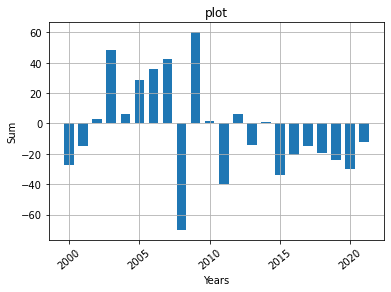

In [19]:
year_wise={}
for i in range(0,5352):
    see=((df.iloc[i]["Close"]-df.iloc[i]["Open"])/df.iloc[i]["Open"])*100
    year=df.iloc[i]["Date"][6]+df.iloc[i]["Date"][7]+df.iloc[i]["Date"][8]+df.iloc[i]["Date"][9]
    year=int(year)
    if year in year_wise:
        year_wise[year]=year_wise[year]+see
    else:
        year_wise[year]=see

x=[]
y=[]
sum=0
for key,value in year_wise.items():
    x.append(key)
    y.append(value)
    sum=sum+value
print(sum)
print(year_wise)

plt.bar(x,y,width=0.7)
plt.xticks(rotation=40)
plt.ylabel("Sum")
plt.xlabel("Years")
plt.grid()
plt.title("plot")
for key,value in year_wise.items():
    print(key,": ",value)
plt.show()

#tendency of market after the opening is negative this is for 20 years
# market tends to make gains just after the opening of market making difficult for traders to earn money beneficial,
# to stay invested while sleeping 

In [20]:
df.tail()

,Date,Open,High,Low,Close,change
5347,01-07-2021,15755.05,15755.55,15667.05,15680.00,-0.263970
5348,02-07-2021,15705.85,15738.35,15635.95,15722.20,0.269133
5349,05-07-2021,15793.40,15845.95,15762.05,15834.35,0.713323
5350,06-07-2021,15813.75,15914.20,15801.00,15818.25,-0.101678
5351,07-07-2021,15819.60,15893.55,15779.70,15879.65,0.388159


In [21]:
mon={}
da={}
da[1]=0
da[2]=0
da[3]=0
da[4]=0
da[5]=0
da[6]=0
da[7]=0
da[8]=0
da[9]=0
da[10]=0
da[11]=0
da[12]=0
da[13]=0
da[14]=0
da[15]=0
da[16]=0
da[17]=0
da[18]=0
da[19]=0
da[20]=0
da[21]=0
da[22]=0
da[23]=0
da[24]=0
da[25]=0
da[26]=0
da[27]=0
da[28]=0
da[29]=0
da[30]=0
da[31]=0

for i in range(0,5352):
    year=df.iloc[i]["Date"][6]+df.iloc[i]["Date"][7]+df.iloc[i]["Date"][8]+df.iloc[i]["Date"][9]
    month=df.iloc[i]["Date"][3]+df.iloc[i]["Date"][4]
    day=df.iloc[i]["Date"][0]+df.iloc[i]["Date"][1]
    year=int(year)
    month=int(month)
    day=int(day)
    c=df.iloc[i]["change"]
    da[day]=da[day]+c
    if month in mon:
        mon[month]=mon[month]+c
    else:
        mon[month]=c
print(mon)
print(da)
sum=0
for key,value in da.items():
    sum=sum+value
print(sum)

{1: -11.291784931110035, 2: -0.03477294628186067, 3: -12.454369678416397, 4: 36.2046556945658, 5: 21.338802858149887, 6: 29.72837209767108, 7: 34.20892718590723, 8: 23.747477259998536, 9: 25.95076645780736, 10: 15.485584363519582, 11: 62.66785493063248, 12: 60.67824500207779}
{1: 60.23097440916125, 2: 41.11185512029787, 3: 10.243984428017216, 4: 28.945112696700672, 5: -1.6999283202685156, 6: 7.501565563053908, 7: 9.510942656865573, 8: -4.436318917198751, 9: 24.713256302738206, 10: 6.237621780233269, 11: -30.112174971931427, 12: -37.22352697343715, 13: 14.140119678031605, 14: 26.40333807545642, 15: 7.665079437631063, 16: 0.7669295356811021, 17: -24.62500659573739, 18: 4.385330401402948, 19: 4.815891898066161, 20: 1.2127084898627833, 21: -15.879035205072897, 22: -37.00781557687259, 23: -10.237732976211829, 24: 3.845334903301635, 25: 30.480766934797487, 26: 37.53144568963623, 27: 7.972717707273101, 28: 25.39065636303088, 29: 37.92951022636612, 30: 26.923514598327028, 31: 29.4926409353196}

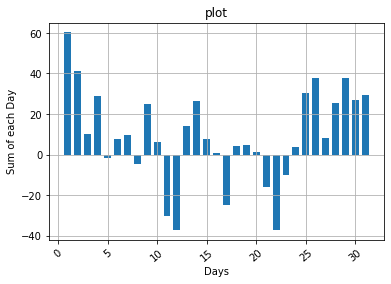

151.4081876366292 12.590642864403085 -73.49032466126118 195.72125245475044


In [22]:
days=np.array([])
change=np.array([])
for key,value in da.items():
    days=np.append(days,key)
    change=np.append(change,value)
plt.bar(days,change,width=0.7)
plt.xticks(rotation=40)
plt.ylabel("Sum of each Day")
plt.xlabel("Days")
plt.grid()
plt.title("plot")
plt.show()
a=0
b=0
c=0
d=0
for i in range(0,8):
    a=a+change[i]
for i in range(8,16):
    b=b+change[i]
for i in range(16,24):
    c=c+change[i]
for i in range(24,31):
    d=d+change[i]
print(a,b,c,d)
# there is high influx of money in the first and last week of the month

In [23]:
y={}
z={}
for i in range(0,5352):
    year=df.iloc[i]["Date"][6]+df.iloc[i]["Date"][7]+df.iloc[i]["Date"][8]+df.iloc[i]["Date"][9]
    month=df.iloc[i]["Date"][3]+df.iloc[i]["Date"][4]
    day=df.iloc[i]["Date"][0]+df.iloc[i]["Date"][1]
    year=int(year)
    month=int(month)
    day=int(day)
    c=df.iloc[i]["change"]
    if year in z:
        z[year]=z[year]+c
    else:
        z[year]=c
    if(day>=1 and day<=8):
        if year in y:
            y[year]=y[year]+c
        else:
            y[year]=c
    if(day>=25 and day<=31):
        if year in y:
            y[year]=y[year]+c
        else:
            y[year]=c
abcd=[]
defg=[]
for key,value in y.items():
    abcd.append(value)
    defg.append(z[key])
n=len(abcd)
for i in range(0,n):
    print(abcd[i],defg[i])
count=0
sum1=0
sum2=0
print("hii")
for i in range(0,n):
    sum1=sum1+abcd[i]
    count=count+1
    sum2=sum2+defg[i]
    if(count==5):
        print(sum1,sum2)
        count=0
        sum1=0
        sum2=0
print(sum1,sum2)

46.44851716017183 -18.40193753477786
2.819327558193713 -14.376652181072519
12.356966324530529 4.608815186062789
48.63365805267495 56.15561544145977
33.012168992051414 14.041081062545617
35.577389434206616 32.56633698377616
23.24631274063314 36.93310929961843
15.577049955024712 46.893574554841855
0.1442006621168076 -63.251533145025036
18.03777656662983 62.092645748300065
6.673426015741667 17.82810790148709
1.484635210848301 -26.096610355794592
16.69502035916679 25.60166800018943
7.631292603927598 8.150245977897313
4.766498954574154 28.087258194454076
-6.999997904009046 -2.8514724623375383
15.138604987998052 4.090077443543833
11.274324934686506 25.601371957857832
4.648525043902295 3.9082011530657157
-2.6670173854670067 12.270375078010526
35.11073893268521 18.84957382957193
17.520020891091434 13.529906160846627
hii
143.27063808762244 42.0269219742178
92.58272935861109 115.23413344151149
37.25087314425851 53.57066971823332
21.394439677110803 43.018553170140365
52.63075982377664 32.37947999

In [24]:
df.head()

,Date,Open,High,Low,Close,change
0,04-01-2000,1594.40,1641.95,1594.40,1638.70,2.920487
1,05-01-2000,1634.55,1635.50,1555.05,1595.80,-2.617929
2,06-01-2000,1595.80,1639.00,1595.80,1617.60,1.366086
3,07-01-2000,1616.60,1628.25,1597.20,1613.30,-0.265826
4,10-01-2000,1615.65,1662.10,1614.95,1632.95,1.218000


In [28]:
win=0
lose=0
target=0
winp=0
losep=0
if(df.iloc[0]["change"]>0):
    target=1
else:
    target=0
arr=[]
count=0
xy=0
for i in range(1,5352):
    count=count+1
    xy=xy+1
    if(count==365):
        
        see=[winp,losep]
        arr.append(see)
        count=0
        winp=0
        losep=0
    if(target==0):
        if(df.iloc[i]["change"]>0):
            lose=lose+1
            losep=losep-df.iloc[i]["change"]
            target=1
        else:
            win=win+1
            winp=winp-df.iloc[i]["change"]
            target=0
    else:
        if(df.iloc[i]["change"]>0):
            win=win+1
            winp=winp+df.iloc[i]["change"]
            target=1
        else:
            lose=lose+1
            losep=losep+df.iloc[i]["change"]
            target=0
print("Number of days you won: ",win)
print("Number of days you lose: ",lose)
print("Won amount: ",winp)
print("Loss amount: ",losep)
print(arr)
print(xy)
for i in arr:
    print(i[0]+i[1])

Number of days you won:  2857
Number of days you lose:  2494
Won amount:  111.28825631201461
Loss amount:  -82.62720557258139
[[303.22226012993394, -222.12404334484992], [190.817075042897, -133.2637276007357], [238.9996189266266, -172.0026230780242], [175.93213736879375, -154.03332635264732], [240.3845747458357, -184.47050452636174], [268.0054542635356, -258.6334110132686], [319.3152753373497, -283.3421603495168], [167.73488183066954, -159.85427744814203], [147.38140509296997, -142.33868864859346], [164.05768509340555, -126.72899398310976], [154.6510759301396, -110.43059422793586], [100.38473942876327, -106.67919843838433], [118.17747302618416, -97.09108552389536], [168.05024505185943, -199.77583081970423]]
5351
81.09821678508402
57.55334744216128
66.99699584860241
21.898811016146425
55.914070219473956
9.37204325026704
35.9731149878329
7.880604382527508
5.042716444376509
37.32869111029579
44.22048170220374
-6.294459009621065
21.0863875022888
-31.72558576784479


In [32]:
win=0
lose=0
target=0
winp=0
losep=0
if(df.iloc[0]["change"]>0):
    target=1
else:
    target=0
count=0
arr=[]
for i in range(1,5352):
    count=count+1
    if(count==251):
        see=[winp,losep]
        arr.append(see)
        count=0
        winp=0
        losep=0
    if(target==0):
        if(df.iloc[i]["change"]>0):
            target=1
    else:
        if(df.iloc[i]["change"]>0):
            win=win+1
            winp=winp+df.iloc[i]["change"]
            target=1
        else:
            lose=lose+1
            losep=losep+df.iloc[i]["change"]
            target=0
print("Number of days you won: ",win)
print("Number of days you lose: ",lose)
print("Won amount: ",winp)
print("Loss amount: ",losep)
print(arr)
for i in arr:
    print(i[0]+i[1])


Number of days you won:  1644
Number of days you lose:  1247
Won amount:  17.654519899429467
Loss amount:  -13.52150408141303
[[100.04518791487261, -81.92982007561363], [75.04165911236845, -49.65541166348336], [52.19768608835247, -41.88383748764616], [107.3474246023352, -47.42298794438174], [71.53065789348837, -68.1585692885679], [79.2234468512752, -39.14485611742379], [90.48885668670871, -53.78636855060937], [93.67492107169572, -58.977868506704375], [102.38100947691711, -122.03572558863124], [108.99826605926373, -79.28010447784418], [53.16532934679243, -50.94922407841881], [57.26073446822811, -50.35383411553274], [55.41554865343333, -44.59512360026315], [64.32213587291751, -53.041780872581604], [66.05155680795703, -28.742269632214967], [39.70227277032126, -37.451393255710414], [50.715344014878596, -42.050142129713905], [35.535257256020174, -20.680359794816876], [35.283312134525055, -28.658713612948183], [41.56352732717022, -33.90029100972778], [97.10342884991029, -89.32401848871768]]


In [33]:
df.shape

(5352, 6)

In [9]:
win=0
lose=0
winp=0
losep=0
arr=[]
count=0
for i in range(0,5351):
    count=count+1
    if(count==251):
        arr.append([winp,losep])
        winp=0
        losep=0
        count=0
    if(df.iloc[i]["change"]>0):
        win=win+1
        winp=winp+df.iloc[i]["change"]
    else:
        lose=lose+1
        losep=losep+df.iloc[i]["change"]
print(winp,losep)
for i in arr:
    print(i[0]+i[1])
    

32.34942623256452 -26.262924927443947
-19.13400195644681
-10.164478395596461
0.29401951570108054
58.719255066274926
11.780697260624919
31.58184423750508
38.553552054552654
46.88272459618973
-66.02521947211125
62.74356049567328
12.47965441442399
-9.890251155425915
19.29486421058155
5.083513503454327
33.82761542169954
-17.510918767515463
19.99498954748121
17.627334032490857
5.6946800261191015
4.437997855897649
33.48366525138701


In [26]:
count=0
arr=[]
start=1000000
for i in range(0,5352):
    count=count+1
    if(count==251):
        arr.append(start)
        start=1000000
        count=0
    if(df.iloc[i]["change"]>0):
        rate=((10*df.iloc[i]["change"])/(0.7))
        if(start>=1000000):
            add=(1000000/100)*rate
            start=start+add
        else:
            add=(start/100)*rate
            start=start+add
    else:
        rate=((10*df.iloc[i]["change"])/(0.7))
        if(start>=1000000):
            add=(1000000/100)*rate
            start=start+add
        else:
            add=(start/100)*rate
            start=start+add
profit=0
arr.append(start)

for i in arr:
    see2=i/1000000
    print(see2)
    if(see2-1>0):
        profit=profit+see2-1
    else:
        profit=profit-1+see2
print(profit)
            

9.675823596511403e-08
0.00012037533945049145
0.14863440235983166
7.568665239836222
0.034575006626410464
3.9081747894459564
5.906757241571006
2.7915461837274798
1.833045689701811e-15
4.920266457600327
1.0401002650294597
0.0027430358249533955
3.4161299997139976
0.05888632425443115
5.638795813390219
0.002763868124893507
3.3670445670024463
3.518190576070126
0.9002596128041918
1.442150356519748
-0.02791117265776408
1.1827917972928654
23.820684836634488


In [30]:
count=0
start=1000000
arr=[]
target=1
for i in range(0,5352):
    count=count+1
    if(count==251):
        arr.append(start)
        start=1000000
        count=0
    if(target==1):
        rate=(df.iloc[i]["change"]*10)/0.7
        if(df.iloc[i]["change"]<0):
            target=0
        if(start>=1000000):
            add=(1000000/100)*rate
            start=start+add
        else:
            add=(start/100)*rate
            start=start+add
    else:
        if(df.iloc[i]["change"]>0):
            target=1
profit=0
arr.append(start)

for i in arr:
    see2=i/1000000
    print(see2)
    if(see2-1>0):
        profit=profit+see2-1
    else:
        profit=profit-1+see2
print(profit)

0.008974955694831624
4.204437793383434
1.7598252188676087
9.01385323497304
-0.07865512737790228
6.489386985260599
6.243212590871327
3.5435947271063033
1.4179064617872814e-06
0.17879520846357252
0.43594629433048976
0.8389612474515645
2.09558709009181
0.4653188613897305
6.262804231462034
1.199857021852191
2.2378859835949587
3.2219471797981627
1.9298770497539142
1.8606315472091923
-0.043950725145956916
1.3172002133866332
31.185493000323994


In [12]:
count=0
arr=[]
start=100000
loss=0
for i in range(0,5352):
    count=count+1
    if(count==251):
        arr.append([start,loss])
        start=100000
        count=0
        loss=0
    if(df.iloc[i]["change"]>0):
        rate=((20*df.iloc[i]["change"])/(0.7))
        if(start>=100000):
            add=(100000/100)*rate
            start=start+add
        else:
            extra=100000-start
            loss=loss+extra
            start=100000
            add=(100000/100)*rate
            start=start+add
    else:
        rate=((20*df.iloc[i]["change"])/(0.7))
        if(start>=100000):
            add=(100000/100)*rate
            start=start+add
        else:
            extra=100000-start
            loss=loss+extra
            start=100000
            add=(100000/100)*rate
            start=start+add
profit=0
arr.append([start,loss])
profit=0
maxi=-1
count=0
mutualf=[]
for i in arr:
    count=count+1
    see1=(i[0]/100000)-(i[1]/100000)
    if(see1>0):
        mutualf.append([see1,count])
    if(profit-100000>0):
        profit=profit+i[0]-i[1]
    else:
        profit=profit+i[0]-i[1]-100000
    if(profit>=500000):
        print(count)
    maxi=max(maxi,(i[1]/100000)+1)
    print("start: ",i[0])
    print("loss: ",i[1],i[1]/100000)
    print(i[0]/100000,'seeme')
print(profit)
print(maxi)
print('break')
r=10
sum=0
for i in mutualf:
    years=22.5-i[1]
    see3=(1.14**years)
    add=i[0]*see3
    temp=add
    add=add*100000
    sum=sum+add
    print(temp,add,sum,i[1],'seeme')
#     print(sum)
print(sum)

start:  398439.2014881054
loss:  845124.9716723044 8.451249716723044
3.984392014881054 seeme
start:  828986.693767808
loss:  1019400.3622134188 10.194003622134188
8.289866937678081 seeme
start:  566741.9155424227
loss:  458341.3579509628 4.583413579509628
5.667419155424227 seeme
4
start:  2220983.9284973117
loss:  443290.9266037438 4.432909266037438
22.209839284973118 seeme
5
start:  1280951.9938660094
loss:  844360.643562441 8.44360643562441
12.809519938660094 seeme
6
start:  1228056.563780753
loss:  225718.15699489546 2.2571815699489544
12.280565637807529 seeme
7
start:  1314087.5569597674
loss:  112557.49825826108 1.125574982582611
13.140875569597673 seeme
8
start:  1724153.1659181737
loss:  284646.748884185 2.8464674888418497
17.24153165918174 seeme
9
start:  543471.8766766638
loss:  2329906.7187369824 23.299067187369825
5.434718766766638 seeme
10
start:  2182719.799198514
loss:  290046.6421792776 2.900466421792776
21.827197991985138 seeme
11
start:  671308.22917286
loss:  214746.6